In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading The Dataset

dataset = pd.read_excel("House Price Prediction.xlsx")

dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Exploring The DataSet**

Performing Exploratory Data Analysis

In [3]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
dataset = dataset.drop(columns=["date","id"])

In [6]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now as per the analysis above our data is clean and  
 
no more cleaning is required as there are no null Values

**Now we will plot co-relation matrix heatmap and see the dependent and independent values**

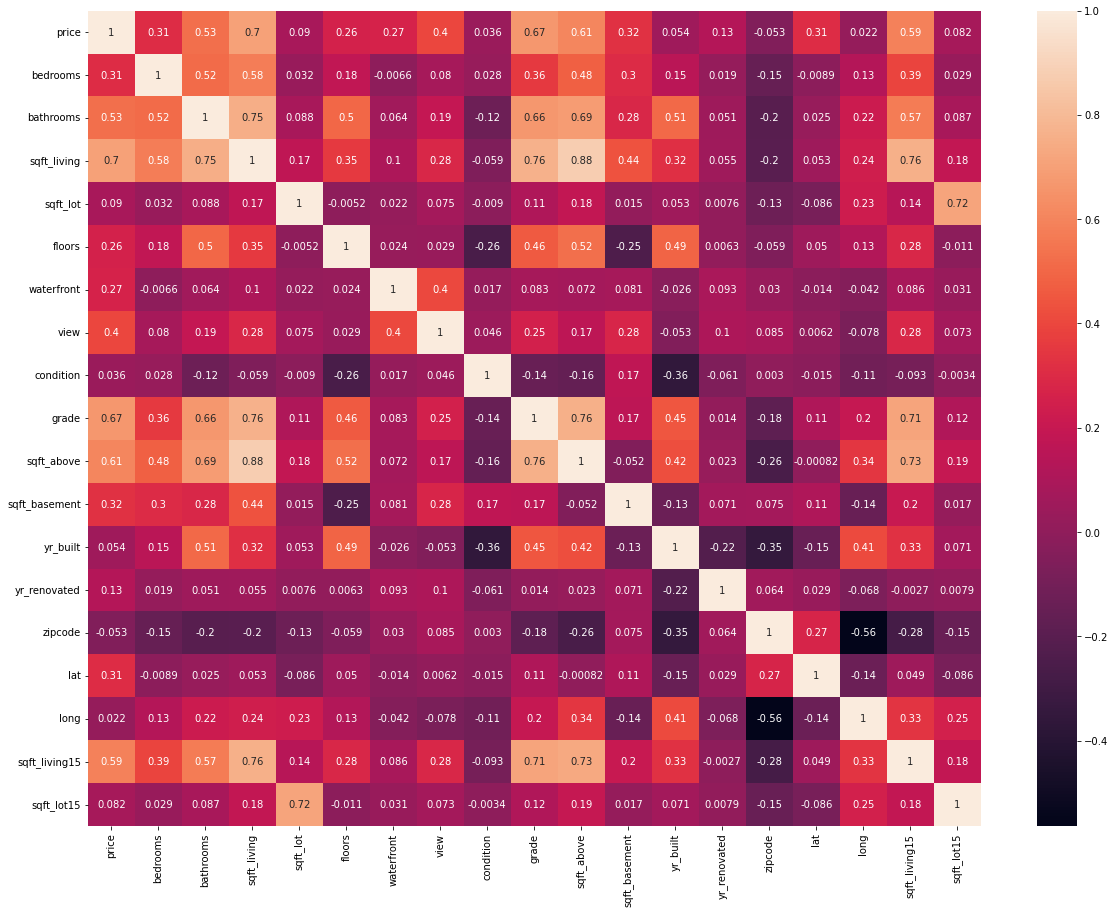

In [7]:
corr_matrix = dataset.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Now on the base of above matrix we will get the features importance or we can say that we are going to perform feature Engineering

In [8]:
cor_target = abs(corr_matrix["price"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
floors           0.256794
waterfront       0.266369
view             0.397293
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_renovated     0.126434
lat              0.307003
sqft_living15    0.585379
Name: price, dtype: float64

In [9]:
to_drop = cor_target[cor_target<0.1]
to_drop_frame = to_drop.to_frame()
to_drop_frame

,price
sqft_lot,0.089661
condition,0.036362
yr_built,0.054012
zipcode,0.053203
long,0.021626
sqft_lot15,0.082447


Now Finally after all these feature engineering, we have the data we want to keep which is making direct relation with prices and

will drop the data which is not making effect on prices . The data to be dropped is in the variable name to_drop_frame

In [10]:

row_names = to_drop_frame.index
row_names_list = list(row_names)
row_names_list.append('price')
y = dataset['price']
X = dataset.drop(row_names_list, axis=1).values

Below Here we will use **Decision Tree Regression Model** for Predicting House Prices

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [12]:
dec_reg = DecisionTreeRegressor()

dec_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [13]:
y_pred = dec_reg.predict(X_test)

Below we are Evaluating our Model Accuracy using the mean absolute percentage error

In [14]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE_Score = mean_absolute_percentage_error(y_test, y_pred)

print("The less the MAPE Score, means the Model is Good ")
MAPE_Score

0.21730116439829425

Now let's check how much is the prediction correct

In [19]:
print("Actual Result")
print(list(y_test)[:10])
print("\nPredicted Result")
print(list(y_pred)[:10])

Actual Result
[335000, 523000, 360000, 410000, 169000, 425000, 355425, 465000, 715000, 394000]

Predicted Result
[307000.0, 540000.0, 442500.0, 325000.0, 279950.0, 381500.0, 480000.0, 570000.0, 900000.0, 366000.0]


**So on the basis of above results we can say that Our Model is working Fine much**